# Project - Leading NHL Player Points

## Objective: Given user input for team name abbreviation & season, show the top 3 NHL players that scored the most points for that given team & season 

(Stats source example: [Covers.com, 2021-2022 season](https://www.covers.com/sport/hockey/nhl/players/statistics/points/2021-2022))


__NOTE__: Covers.com stats does not include ALL of the teams for player stats (only displays top 50 players across the entire league), so, *for now*, this project will only focus on the teams that are currently listed on the stats page for the user-inputted season

*Inspired by PythonReview\EXERCISES\Exercise - Regular Expressions & Web Crawler (2022 NHL Statistics)*

<hr>

Also Covers.com will automatically default to the Playoffs section on page reload, this project is showing information from the Regular Season:

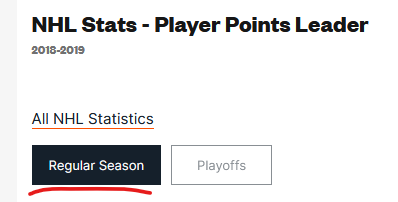

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="RESOURCES/regular-season-vs-playoffs.png")

### To-Do List:
* Allow varied user input (e.g. "ranger", "arizona", etc.) + use list of team name abbreviations & regex to determine which team the user is referring to

* Data Validation:
    * Add condition to check if table of data is null or not (e.g. if the season hasn't started yet)
    * User input for season
    * Case-sensitive for team abbreviation?

<br>

* *Based on above, update functions to be applicable for ALL NHL teams* --> __KINDA DONE__: only accounts for the teams that appear on the Covers.com stats page, need to do more research for stats for ALL teams

* ~~Update standard setup for BeatifulSoup to allow dynamic URL season by season changes (may also need to include in user input)~~ --> __DONE: `get_nhl_season()` function__

* Once everything is functional, consider adding it to website portfolio (scrape for more details/image of players based on player last name & team)

In [2]:
import requests # one of the ways to connect to websites via Python
from bs4 import BeautifulSoup # allows you to go through page source and get data
import re # regular expressions library

### GET SEASON FROM USER:

NOTE: Functional, but definitely need to do data validation to account for dumb user input

In [24]:
def get_nhl_season():
    season = input("Enter the season in YYYY-YYYY format:")

    return season

In [25]:
## outside of function scope so it can be used in multiple functions
season = get_nhl_season()

### BEAUTIFULSOUP SETUP:

In [26]:
###### STANDARD SETUP FOR BEATUIFULSOUP ######
url = "https://www.covers.com/sport/hockey/nhl/players/statistics/points/"+season

# GET request; stores page HTML source in variable
source_code = requests.get(url) 

# gets the front end text of the HTMl source code; ignoring back end stuff; essentally parses through HTML source
plain_text = source_code.text 

# can sort through this variable
soup = BeautifulSoup(plain_text) 


###### ACCESS TABLE & GET TABLE HEADERS/ROWS ######
table = soup.find("table", attrs={"id":"RegularSeason"})
table_headers = table.thead.find_all("th") # find all th's within table's thead section
table_rows = table.tbody.find_all("tr") # find all tr's within table's tbody section

### __GET DATA__ -- GET PLAYER STATS FOR USER-INPUTTED SEASON:

In [27]:
def get_nhl_stats():
    
    ###### CREATE LIST OF HEADERS ######
    list_of_headings = []

    for headers in table_headers:
        # remove any newlines and extra spaces from left and right 
        list_of_headings.append(headers.text.replace('\n', ' ').strip())
        
    #print(list_of_headings)  #['# Player', 'Team', 'POS', 'GP', '+/-', 'SOG', 'PPG', 'SHG', 'G', 'A', 'P']




    ###### CREATE LIST OF TABLE ROW DATA & COMBINE W/ HEADERS TO MAKE DICTIONARY ######
    # list of multiple dictionaries
    table_data = []

    for rows in table_rows: 

        # each row is stored as dictionary consisting of the data
        # EXAMPLE: rows = {'# Player': '', 'Team': '', 'POS': '', ...}
        rows_dict = {}

        # zip() allows you to combine two pieces of data & iterate over them as a tuple
        for td, header in zip(rows.find_all("td"), list_of_headings): 
            # to fix issue where number before player's name didn't have a space between the number & name
            if header == '# Player': 
                rows_dict[header] = td.text.replace('\n', ' ').rstrip().lstrip()
            else:
                rows_dict[header] = td.text.replace('\n', '').strip()

        table_data.append(rows_dict)




    return table_data


In [28]:
# list consisting of multiple table rows as key[headers], value[data] dictionaries
#get_nhl_stats()

for x in get_nhl_stats():
    print(x)

{'# Player': '1 N. Kucherov', 'Team': 'TB', 'POS': 'RW', 'GP': '82', '+/-': '24', 'SOG': '246', 'PPG': '15', 'SHG': '0', 'G': '41', 'A': '87', 'P': '128'}
{'# Player': '2 C. McDavid', 'Team': 'EDM', 'POS': 'C', 'GP': '78', '+/-': '3', 'SOG': '240', 'PPG': '9', 'SHG': '1', 'G': '41', 'A': '75', 'P': '116'}
{'# Player': '3 P. Kane', 'Team': 'CHI', 'POS': 'RW', 'GP': '81', '+/-': '2', 'SOG': '341', 'PPG': '9', 'SHG': '0', 'G': '44', 'A': '66', 'P': '110'}
{'# Player': '4 L. Draisaitl', 'Team': 'EDM', 'POS': 'C', 'GP': '82', '+/-': '2', 'SOG': '231', 'PPG': '16', 'SHG': '3', 'G': '50', 'A': '55', 'P': '105'}
{'# Player': '5 B. Marchand', 'Team': 'BOS', 'POS': 'LW', 'GP': '79', '+/-': '15', 'SOG': '231', 'PPG': '10', 'SHG': '3', 'G': '36', 'A': '64', 'P': '100'}
{'# Player': '6 S. Crosby', 'Team': 'PIT', 'POS': 'C', 'GP': '79', '+/-': '18', 'SOG': '220', 'PPG': '12', 'SHG': '0', 'G': '35', 'A': '65', 'P': '100'}
{'# Player': '7 N. MacKinnon', 'Team': 'COL', 'POS': 'C', 'GP': '82', '+/-': '2

### ~~GET & CLEAN FULL TEAM NAMES:~~

Just realized that this Wikipedia article includes abbreviations that don't match up to the abbreviations on Covers.com; Tried another approach below

In [29]:
def full_nhl_team_names():
    ###### STANDARD SETUP FOR BEATUIFULSOUP ######
    url = "https://en.wikipedia.org/wiki/Template:NHL_team_abbreviations"

    # GET request; stores page HTML source in variable
    source_code = requests.get(url) 

    # gets the front end text of the HTMl source code; ignoring back end stuff; essentally parses through HTML source
    plain_text = source_code.text 

    # can sort through this variable
    soup = BeautifulSoup(plain_text) 



    ###### SEPARATING ABBREVIATIONS & FULL TEAM NAMES USING REGEX ######
    nhl_team_list = soup.find("div", attrs={"class": "div-col"}).get_text()

    nhl_abbrev_list = re.findall(r'([A-Z].*)\s–', nhl_team_list) ## OUTPUT: ['AFM', 'ANA', 'ARI', 'ATL', 'BOS', 'BRK', 'BUF', 'CAR', 'CBJ', 'CGS', 'CGY', 'CHI', 'CLE', 'CLR', 'COL', 'DAL', 'DCG', 'DET', 'DFL', 'EDM', 'FLA', 'HAM', 'HFD', 'KCS', 'LAK', 'MIN', 'MMR', 'MNS', 'MTL', 'MWN', 'NJD', 'NSH', 'NYA', 'NYI', 'NYR', 'OAK', 'OTT', 'PHI', 'PHX', 'PIR', 'PIT', 'QBD', 'QUA', 'QUE', 'SEA', 'SEN', 'SLE', 'SJS', 'STL', 'TAN', 'TBL', 'TOR', 'TSP', 'VAN', 'VGK', 'WIN', 'WPG', 'WSH']
    nhl_full_name_list = re.findall(r'[A-Z].*\s–\s([A-Z].*)', nhl_team_list) ## OUTPUT: ['Atlanta Flames', 'Mighty Ducks of Anaheim/Anaheim Ducks', 'Arizona Coyotes', 'Atlanta Thrashers', 'Boston Bruins', 'Brooklyn Americans', 'Buffalo Sabres', 'Carolina Hurricanes', 'Columbus Blue Jackets', 'Bay Area Seals/California Golden Seals', 'Calgary Flames', 'Chicago Black Hawks/Blackhawks', 'Cleveland Barons', 'Colorado Rockies', 'Colorado Avalanche', 'Dallas Stars', 'Detroit Cougars', 'Detroit Red Wings', 'Detroit Falcons', 'Edmonton Oilers', 'Florida Panthers', 'Hamilton Tigers', 'Hartford Whalers', 'Kansas City Scouts', 'Los Angeles Kings', 'Minnesota Wild', 'Montreal Maroons', 'Minnesota North Stars', 'Montreal Canadiens', 'Montreal Wanderers', 'New Jersey Devils', 'Nashville Predators', 'New York Americans', 'New York Islanders', 'New York Rangers', 'California/Oakland Seals', 'Ottawa Senators', 'Philadelphia Flyers', 'Phoenix Coyotes', 'Pittsburgh Pirates', 'Pittsburgh Penguins', 'Quebec Bulldogs', 'Philadelphia Quakers', 'Quebec Nordiques', 'Seattle Kraken', 'Ottawa Senators (original)', 'St. Louis Eagles', 'San Jose Sharks', 'St. Louis Blues', 'Toronto Hockey Club/Toronto Arenas', 'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Toronto St. Patricks', 'Vancouver Canucks', 'Vegas Golden Knights', 'Winnipeg Jets (original)', 'Winnipeg Jets', 'Washington Capitals']


    ###### COMBINING ABBREVIATIONS & FULL TEAM NAMES INTO A DICTIONARY ######
    nhl_teams = {}

    for index in range(len(nhl_abbrev_list)):
        nhl_teams[nhl_abbrev_list[index]] = nhl_full_name_list[index]

    

    ###### CLEANING UP DICTIONARY ITEMS & REMOVING INACTIVE/DUPLICATE NHL TEAMS ######
    del nhl_teams['AFM']
    del nhl_teams['ATL']
    del nhl_teams['BRK']
    del nhl_teams['CGS']
    del nhl_teams['CLE']
    del nhl_teams['CLR']
    del nhl_teams['DCG']
    del nhl_teams['DFL']
    del nhl_teams['HAM']
    del nhl_teams['HFD']
    del nhl_teams['KCS']
    del nhl_teams['MMR']
    del nhl_teams['MNS']
    del nhl_teams['MWN']
    del nhl_teams['NYA']
    del nhl_teams['OAK']
    del nhl_teams['PIR']
    del nhl_teams['QBD']
    del nhl_teams['QUA']
    del nhl_teams['QUE']
    del nhl_teams['SLE']
    del nhl_teams['TAN']
    del nhl_teams['TSP']
    del nhl_teams['SEN']
    del nhl_teams['WPG']
    del nhl_teams['PHX']
    del nhl_teams['CGY']

    nhl_teams['ANA'] = 'Anaheim Ducks'
    nhl_teams['CHI'] = 'Chicago Blackhawks'
    nhl_teams['WIN'] = 'Winnipeg Jets'
    nhl_teams['CAL'] = 'Calgary Flames'

    return nhl_teams



full_nhl_team_names()

{'ANA': 'Anaheim Ducks',
 'ARI': 'Arizona Coyotes',
 'BOS': 'Boston Bruins',
 'BUF': 'Buffalo Sabres',
 'CAR': 'Carolina Hurricanes',
 'CBJ': 'Columbus Blue Jackets',
 'CHI': 'Chicago Blackhawks',
 'COL': 'Colorado Avalanche',
 'DAL': 'Dallas Stars',
 'DET': 'Detroit Red Wings',
 'EDM': 'Edmonton Oilers',
 'FLA': 'Florida Panthers',
 'LAK': 'Los Angeles Kings',
 'MIN': 'Minnesota Wild',
 'MTL': 'Montreal Canadiens',
 'NJD': 'New Jersey Devils',
 'NSH': 'Nashville Predators',
 'NYI': 'New York Islanders',
 'NYR': 'New York Rangers',
 'OTT': 'Ottawa Senators',
 'PHI': 'Philadelphia Flyers',
 'PIT': 'Pittsburgh Penguins',
 'SEA': 'Seattle Kraken',
 'SJS': 'San Jose Sharks',
 'STL': 'St. Louis Blues',
 'TBL': 'Tampa Bay Lightning',
 'TOR': 'Toronto Maple Leafs',
 'VAN': 'Vancouver Canucks',
 'VGK': 'Vegas Golden Knights',
 'WIN': 'Winnipeg Jets',
 'WSH': 'Washington Capitals',
 'CAL': 'Calgary Flames'}

### GET, CLEAN, & MAP FULL TEAM NAMES (VERSION 2):

In [30]:
def full_nhl_team_names_correct():

    nhl_teams = {} # going to be used to store the team abbreviation on the stats page and the href for that abbreviation


    for row in table_rows:
        # targeting the 2nd <td> element (where the team abbreviation and href are)
        team_initials = row.td.findNextSibling().get_text()

        # within the 2nd <td> element, find the <a> and retrieve the href
        team_href = row.td.findNextSibling().find("a").get("href")
        
        nhl_teams[team_initials] = team_href
        #print(row.td.findNextSibling())
    

    for team_abbrev, link in nhl_teams.items():
        # gets rid of the rest of the link and only retrieves the end where the name is
        regex = re.findall(r'.+/(.+$)', link)[0]

        # replace dashes (-) with whitespace, then capitalize the first letter of each word
        regex = regex.replace('-', ' ').title()

        nhl_teams[team_abbrev] = regex


    return nhl_teams

full_nhl_team_names_correct()

{'TB': 'Tampa Bay Lightning',
 'EDM': 'Edmonton Oilers',
 'CHI': 'Chicago Blackhawks',
 'BOS': 'Boston Bruins',
 'PIT': 'Pittsburgh Penguins',
 'COL': 'Colorado Avalanche',
 'CAL': 'Calgary Flames',
 'FLA': 'Florida Panthers',
 'TOR': 'Toronto Maple Leafs',
 'WIN': 'Winnipeg Jets',
 'WAS': 'Washington Capitals',
 'CLB': 'Columbus Blue Jackets',
 'PHI': 'Philadelphia Flyers',
 'CAR': 'Carolina Hurricanes',
 'SJ': 'San Jose Sharks',
 'BUF': 'Buffalo Sabres',
 'DAL': 'Dallas Stars',
 'STL': 'St. Louis Blues',
 'NYR': 'New York Rangers',
 'VEG': 'Vegas Golden Knights',
 'DET': 'Detroit Red Wings',
 'MON': 'Montreal Canadiens'}

In [31]:
### REGEX PRACTICE

example = '/sport/hockey/nhl/teams/main/edmonton-oilers'

# $: matches end of string
# .: matches any character
# +: repeats matching one or more times
# this will look at the end of the string and then stop right after the last forward slash

print(re.findall(r'.+/(.+$)', example)[0])

edmonton-oilers


### ASSIGN ABOVE PLAYER STATS TO A VARIABLE:

In [32]:
data = get_nhl_stats()

### GET TEAM NAME ABBREVIATIONS

Not really necessary but keeping just in case

In [33]:
def get_nhl_team_abbreviation():
    uniqueTeams = set() 

    for player_row in data:
        teamInitials = uniqueTeams.add(player_row['Team'])

    return uniqueTeams

### __DISPLAY DATA__ -- REGEX TO FIND TOP SCORING PLAYERS FOR USER-INPUTTED TEAM:

Points for each player is in the last column of the table ('P' column)

In [34]:
def top_player_stats_regex():
    player_points_tuples_list = []

    
    mappedTeamNames = full_nhl_team_names_correct()
    team_abbreviations_string = ""

    # Iterate over keys and append to team_abbreviations_string variable
    for abbrev, fullname in mappedTeamNames.items():
        team_abbreviations_string = team_abbreviations_string + abbrev + ", "

    # Get rid of the extra comma at the end
    team_abbreviations_string = team_abbreviations_string[:-2]


    teamNameInput = input("Enter the NHL team abbreviation, choose from the following: ("+team_abbreviations_string+")")

    

    # Iterates over each dictionary that specifies the stats for one player
    for player_row in data:
        if player_row['Team'] == teamNameInput and player_row != None:

            player_name_orig = str(player_row['# Player'])
            player_name_txt_only = (re.findall(r'([A-Z].+)', player_name_orig))[0]
            
            # getting & sorting player points using tuples
            points_scored = int(player_row['P'])
            
            player_points_tuples_list.append((points_scored, player_name_txt_only)) # reversed tuple (value, key) pair for sorting
            player_points_tuples_list = sorted(player_points_tuples_list, reverse=True) # points sorted in descending order


    

    # If above loop was not able to find any players based on user input (e.g. team not listed on Covers.com stats page)
    if len(player_points_tuples_list) == 0:
        print(teamNameInput + " didn't make the cut for the " + season + " season and is not listed on stats page, try another team \n")
        top_player_stats_regex()
        
    # If above loop was able to find players, go ahead and find the top 3 players
    else:
        print("Top 3 scoring leaders for the", season, mappedTeamNames[teamNameInput], "\n")        
        for v, k in player_points_tuples_list[:3]:
            print(k, "---", v, "goals scored this season")


## Top 3 Scoring Leaders for the 2021-2022 Colorado Avalanche:

In [18]:
# COL
top_player_stats_regex()

Top 3 scoring leaders for the 2021-2022 Colorado Avalanche 

M. Rantanen --- 92 goals scored this season
N. MacKinnon --- 88 goals scored this season
N. Kadri --- 87 goals scored this season


## Top 3 Scoring Leaders for the 2018-2019 Colorado Avalanche:

In [35]:
# COL
top_player_stats_regex()

Top 3 scoring leaders for the 2018-2019 Colorado Avalanche 

N. MacKinnon --- 99 goals scored this season
M. Rantanen --- 87 goals scored this season
G. Landeskog --- 75 goals scored this season


## Top 3 Scoring Leaders for the 2021-2022 New York Rangers:

In [20]:
# NYR
top_player_stats_regex()

Top 3 scoring leaders for the 2021-2022 New York Rangers 

M. Zibanejad --- 81 goals scored this season
C. Kreider --- 77 goals scored this season
A. Fox --- 74 goals scored this season


## Top 3 Scoring Leaders for the 2021-2022 Dallas Stars:

In [21]:
# DAL
top_player_stats_regex()

Top 3 scoring leaders for the 2021-2022 Dallas Stars 

J. Pavelski --- 81 goals scored this season
J. Robertson --- 79 goals scored this season
R. Hintz --- 72 goals scored this season


## Top 3 Scoring Leaders for the 2021-2022 Los Angeles Kings: 
*Per usual for LA, not listed on top stats page for 2021-2022*

In [22]:
# LA
top_player_stats_regex()

LA didn't make the cut for the 2021-2022 season and is not listed on stats page, try another team 

Top 3 scoring leaders for the 2021-2022 Carolina Hurricanes 

S. Aho --- 81 goals scored this season


<hr>
<hr>

In [23]:
# REGEX TEST EXAMPLE: Separating/removing number before player name

temp = "3 C. Makar"

temp_str = (re.findall(r'([A-Z].+)', temp))

print(temp_str)

print(temp_str[0])

['C. Makar']
C. Makar


[Helpful Documentation](https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup)